# Analysis on Netflix Movies & TV Shows
Netflix is a popular service that people across the world use for entertainment. In this EDA, I will explore the netflix-shows dataset through visualizations and graphs using matplotlib and seaborn.

### Package Install and Import
First, we will install and import necessary packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

### Loading the Dataset
Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas. Let's take a glimpse at how the data looks like.

In [3]:
netflix_titles_df = pd.read_csv('netflix_titles.csv')
netflix_titles_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


After a quick glimpse at the dataset, it looks like a typical movies/shows dataset without user ratings. We can also see that there are NaN values in some columns.

# Data Preparation and Cleaning

In [4]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


There are 6,234 entries and 12 columns to work with for EDA. Right off the bat, there are a few columns that contain null values ('director', 'cast', 'country', 'date_added', 'rating').

In [5]:
netflix_titles_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

### Handling Null Values
We can see that for each of the columns, there are alot different unique values for some of them. It makes sense that show_id is large since it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed_in, and description contain many unique values as well.

In [10]:
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

 we can see that there are quite a few null values in the dataset. There are a total of 3,036 null values across the entire dataset with 1,969 missing points under 'director', 570 under 'cast', 476 under 'country', 11 under 'date_added', and 10 under 'rating'. We will have to handle all null data points before we can dive into EDA and modeling.

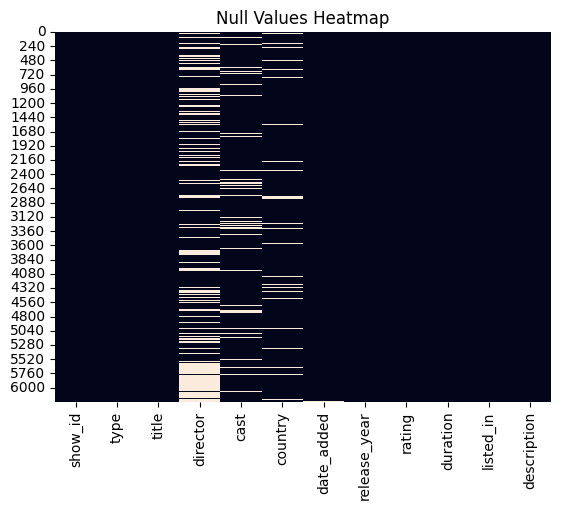

In [9]:
sns.heatmap(netflix_titles_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [7]:
# Fill missing values
netflix_titles_df['director'] = netflix_titles_df['director'].fillna('No Director')
netflix_titles_df['cast'] = netflix_titles_df['cast'].fillna('No Cast')
netflix_titles_df['country'] = netflix_titles_df['country'].fillna('Country Unavailable')

# Drop rows where date_added or rating is missing
netflix_titles_df = netflix_titles_df.dropna(subset=['date_added', 'rating'])
# have a look at the cleaned data
netflix_titles_df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [8]:
netflix_titles_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. Since 'director', 'cast', and 'country' contain the majority of null values, I will choose to treat each missing value as unavailable. The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so I will drop them from the dataset. After, we can see that there are no more null values in the dataset.

In [9]:
# check for duplicates
netflix_titles_df.duplicated().sum()


0

As we can see there is no duplicate values

### Splitting the Dataset
Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [10]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [11]:
netflix_shows_df = netflix_titles_df[netflix_titles_df['type']=='TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Country Unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
